### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#pd.reset_option('all')
# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete = school_data_complete.dropna(how='any')

## District Summary

* Calculate the total number of schools

* Calculate the total number of students

* Calculate the total budget

* Calculate the average math score 

* Calculate the average reading score

* Calculate the percentage of students with a passing math score (70 or greater)

* Calculate the percentage of students with a passing reading score (70 or greater)

* Calculate the percentage of students who passed math **and** reading (% Overall Passing)

* Create a dataframe to hold the above results

* Optional: give the displayed data cleaner formatting

In [15]:
summary = pd.DataFrame(columns=['Total Schools','Total Students'])
total_schools = school_data_complete['school_name'].nunique()
summary['Total Schools'] = [total_schools]
total_students = school_data_complete['student_name'].count()
summary['Total Students'] = [total_students]
total_budget = school_data['budget'].sum()
summary['Totoal Budget'] = [total_budget]
average_math_score = student_data['math_score'].mean()
summary['Average Math Score'] = [average_math_score]
average_reading_score = student_data['reading_score'].mean()
summary['Average Reading Score'] = [average_reading_score]
students_passing = student_data[student_data['math_score'] >= 70]
perc_students_math = (students_passing['math_score'].count()/total_students )* 100.0
summary['% Passing Math'] = [perc_students_math]
num_students_passing = student_data[student_data['reading_score'] >= 70]
num_students_passing_reading = num_students_passing['reading_score'].count()
perc_students_reading = (num_students_passing['reading_score'].count()/total_students) * 100.0
summary['% Passing Reading'] = [perc_students_reading]
all_students_pass = student_data[ (student_data['math_score'] >= 70) & (student_data['reading_score'] >= 70)]
overall_passing = (all_students_pass ['student_name'].count()/total_students)*100
summary['% Overall Passing'] = [overall_passing]
summary

,Total Schools,Total Students,Totoal Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,39170,24649428,78.985371,81.87784,74.980853,85.805463,65.172326



## School Summary

* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * % Overall Passing (The percentage of students that passed math **and** reading.)
  
* Create a dataframe to hold the above results

In [16]:
grouped_by_school = school_data_complete.groupby(['school_name','type'],as_index=False)
students_by_school = grouped_by_school['student_name'].count()
#print(grouped_by_school.head(10))
budget_by_school = school_data.sort_values('school_name')['budget']
budget_by_school = budget_by_school.reset_index(drop=True)
per_student_budget = budget_by_school.divide(students_by_school['student_name'])

avg_reading_score = grouped_by_school['reading_score'].mean()
avg_math_score = grouped_by_school['math_score'].mean()

passing_reading_df = school_data_complete[school_data_complete['reading_score'] >= 70]
passing_reading = passing_reading_df.groupby(['school_name','type'],as_index=False).count()
perc_passing_reading = passing_reading['reading_score'].divide(students_by_school['student_name']) * 100.0

passing_math_df = school_data_complete[school_data_complete['math_score'] >= 70]
passing_math = passing_math_df.groupby(['school_name','type'],as_index=False).count()
perc_passing_math = passing_math['math_score'].divide(students_by_school['student_name']) * 100.0

passing_both_df = school_data_complete[ (school_data_complete['reading_score'] >= 70) &
                                    (school_data_complete['math_score'] >= 70)]
passing_both = passing_both_df.groupby(['school_name','type'],as_index=False).count()
perc_passing_both = passing_both['math_score'].divide(students_by_school['student_name']) * 100.0

school_summary = pd.DataFrame( {"School Name": students_by_school['school_name'],
                                "School Type" : students_by_school['type'],
                                'Total Students': students_by_school['student_name'],
                                "Total Budget": budget_by_school,
                                "Per Student Budget" :per_student_budget,
                                "Avg. Reading Score":avg_reading_score['reading_score'],
                                "Avg Math Score":avg_math_score['math_score'],
                                "% Passing Reading" :perc_passing_reading,
                                "% Passing Math":perc_passing_math,
                               "% Overall Passing" :perc_passing_both })
school_summary.reset_index()
school_summary.set_index('School Name')
school_summary

,School Name,School Type,Total Students,Total Budget,Per Student Budget,Avg. Reading Score,Avg Math Score,% Passing Reading,% Passing Math,% Overall Passing
0,Bailey High School,District,4976,3124928,628.0,81.033963,77.048432,81.933280,66.680064,54.642283
1,Cabrera High School,Charter,1858,1081356,582.0,83.975780,83.061895,97.039828,94.133477,91.334769
2,Figueroa High School,District,2949,1884411,639.0,81.158020,76.711767,80.739234,65.988471,53.204476
3,Ford High School,District,2739,1763916,644.0,80.746258,77.102592,79.299014,68.309602,54.289887
4,Griffin High School,Charter,1468,917500,625.0,83.816757,83.351499,97.138965,93.392371,90.599455
5,Hernandez High School,District,4635,3022020,652.0,80.934412,77.289752,80.862999,66.752967,53.527508
6,Holden High School,Charter,427,248087,581.0,83.814988,83.803279,96.252927,92.505855,89.227166
7,Huang High School,District,2917,1910635,655.0,81.182722,76.629414,81.316421,65.683922,53.513884
8,Johnson High School,District,4761,3094650,650.0,80.966394,77.072464,81.222432,66.057551,53.539172
9,Pena High School,Charter,962,585858,609.0,84.044699,83.839917,95.945946,94.594595,90.540541


## Top Performing Schools (By % Overall Passing)

In [17]:
school_summary_sort = school_summary.sort_values("% Overall Passing").reset_index(drop=True)


* Sort and display the top five performing schools by % overall passing.

In [18]:
school_summary_sort.tail(5)

,School Name,School Type,Total Students,Total Budget,Per Student Budget,Avg. Reading Score,Avg Math Score,% Passing Reading,% Passing Math,% Overall Passing
10,Pena High School,Charter,962,585858,609.0,84.044699,83.839917,95.945946,94.594595,90.540541
11,Wilson High School,Charter,2283,1319574,578.0,83.989488,83.274201,96.539641,93.867718,90.582567
12,Griffin High School,Charter,1468,917500,625.0,83.816757,83.351499,97.138965,93.392371,90.599455
13,Thomas High School,Charter,1635,1043130,638.0,83.848930,83.418349,97.308869,93.272171,90.948012
14,Cabrera High School,Charter,1858,1081356,582.0,83.975780,83.061895,97.039828,94.133477,91.334769


## Bottom Performing Schools (By % Overall Passing)

* Sort and display the five worst-performing schools by % overall passing.

In [19]:
school_summary_sort.head(5)

,School Name,School Type,Total Students,Total Budget,Per Student Budget,Avg. Reading Score,Avg Math Score,% Passing Reading,% Passing Math,% Overall Passing
0,Rodriguez High School,District,3999,2547363,637.0,80.744686,76.842711,80.220055,66.366592,52.988247
1,Figueroa High School,District,2949,1884411,639.0,81.158020,76.711767,80.739234,65.988471,53.204476
2,Huang High School,District,2917,1910635,655.0,81.182722,76.629414,81.316421,65.683922,53.513884
3,Hernandez High School,District,4635,3022020,652.0,80.934412,77.289752,80.862999,66.752967,53.527508
4,Johnson High School,District,4761,3094650,650.0,80.966394,77.072464,81.222432,66.057551,53.539172


## Math Scores by Grade

* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

In [20]:
grade_9_students = school_data_complete.loc[school_data_complete['grade'] == '9th', :]
grade_9_students = (grade_9_students.groupby('school_name'))['math_score'].mean()
grade_10_students = school_data_complete.loc[school_data_complete['grade'] == '10th', :]
grade_10_students = (grade_10_students.groupby('school_name'))['math_score'].mean()
grade_11_students = school_data_complete.loc[school_data_complete['grade'] == '11th', :]
grade_11_students = (grade_11_students.groupby('school_name'))['math_score'].mean()
grade_12_students = school_data_complete.loc[school_data_complete['grade'] == '12th', :]
grade_12_students = (grade_12_students.groupby('school_name'))['math_score'].mean()
math_score_by_grade = pd.DataFrame( { '9th':grade_9_students,
                                        '10th':grade_10_students,
                                        '11th':grade_11_students,
                                        '12th' :grade_12_students})
math_score_by_grade

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


## Reading Score by Grade 

* Perform the same operations as above for reading scores

In [21]:
grade_9_students = school_data_complete.loc[school_data_complete['grade'] == '9th', :]
grade_9_students = (grade_9_students.groupby('school_name'))['reading_score'].mean()
grade_10_students = school_data_complete.loc[school_data_complete['grade'] == '10th', :]
grade_10_students = (grade_10_students.groupby('school_name'))['reading_score'].mean()
grade_11_students = school_data_complete.loc[school_data_complete['grade'] == '11th', :]
grade_11_students = (grade_11_students.groupby('school_name'))['reading_score'].mean()
grade_12_students = school_data_complete.loc[school_data_complete['grade'] == '12th', :]
grade_12_students = (grade_12_students.groupby('school_name'))['reading_score'].mean()
reading_score_by_grade = pd.DataFrame( { '9th':grade_9_students,
                                        '10th':grade_10_students,
                                        '11th':grade_11_students,
                                        '12th' :grade_12_students})
print(reading_score_by_grade)

                             9th       10th       11th       12th
school_name                                                      
Bailey High School     81.303155  80.907183  80.945643  80.912451
Cabrera High School    83.676136  84.253219  83.788382  84.287958
Figueroa High School   81.198598  81.408912  80.640339  81.384863
Ford High School       80.632653  81.262712  80.403642  80.662338
Griffin High School    83.369193  83.706897  84.288089  84.013699
Hernandez High School  80.866860  80.660147  81.396140  80.857143
Holden High School     83.677165  83.324561  83.815534  84.698795
Huang High School      81.290284  81.512386  81.417476  80.305983
Johnson High School    81.260714  80.773431  80.616027  81.227564
Pena High School       83.807273  83.612000  84.335938  84.591160
Rodriguez High School  80.993127  80.629808  80.864811  80.376426
Shelton High School    84.122642  83.441964  84.373786  82.781671
Thomas High School     83.728850  84.254157  83.585542  83.831361
Wilson Hig

In [22]:
print()

## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

In [23]:
bins = [0,584,629,644,675]
group_names = ["<$584","$585-629","$630-644","$645-675"]
school_summary['Scores by spending'] = pd.cut(school_summary['Per Student Budget'],
                                              bins,labels=group_names,include_lowest=True)
#school_summary['Overall passing Rate'] =  school_summary[["% Passing Reading","% Passing Math"]].mean(axis=1)
scores_by_school_spending = school_summary.groupby('Scores by spending')
print(scores_by_school_spending['Per Student Budget'].count())

scores_by_school_spending[['Avg Math Score','Avg. Reading Score','% Passing Math',
                           '% Passing Reading','% Overall Passing']].mean()


Scores by spending
<$584       4
$585-629    4
$630-644    4
$645-675    3
Name: Per Student Budget, dtype: int64


,Avg Math Score,Avg. Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Scores by spending,,,,,
<$584,83.455399,83.933814,93.460096,96.610877,90.369459
$585-629,81.899826,83.155286,87.133538,92.718205,81.418596
$630-644,78.518855,81.624473,73.484209,84.391793,62.857656
$645-675,76.997210,81.027843,66.164813,81.133951,53.526855


## Scores by School Size

* Perform the same operations as above, based on school size.

In [34]:
bins = [0,1000,2000,5000]
group_names = ["Small(<1000)","Medium(1000-2000)","Large(2000-5000)"]
school_summary['School Size'] = pd.cut(school_summary['Total Students'],
                                              bins,labels=group_names,include_lowest=True)

scores_by_school_size = school_summary.groupby('School Size')
print(scores_by_school_size['School Size'].count())

scores_by_school_size[['Avg Math Score','Avg. Reading Score','% Passing Math',
                           '% Passing Reading','% Overall Passing']].mean()


School Size
Small(<1000)         2
Medium(1000-2000)    5
Large(2000-5000)     8
Name: School Size, dtype: int64


,Avg Math Score,Avg. Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small(<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium(1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large(2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


## Scores by School Type

* Perform the same operations as above, based on school type

In [33]:
scores_by_school_type = school_summary.groupby('School Type')
print(scores_by_school_type['School Type'].count())

mean_scores = scores_by_school_type[['Avg Math Score','Avg. Reading Score','% Passing Math',
                           '% Passing Reading','% Overall Passing']].mean()
mean_scores

School Type
Charter     8
District    7
Name: School Type, dtype: int64


,Avg Math Score,Avg. Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208


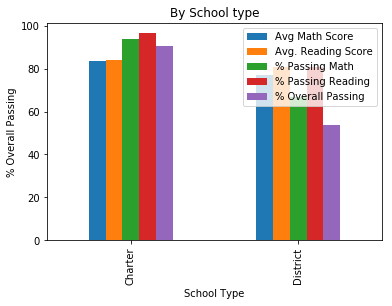

In [32]:
school_chart = mean_scores.plot(kind='bar',title='By School type')
school_chart.set_xlabel('School Type')
school_chart.set_ylabel('% Overall Passing')
plt.show()

<BarContainer object of 15 artists>

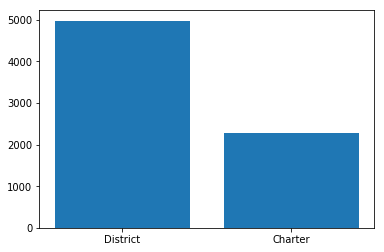

In [45]:
school_types = scores_by_school_type['School Type'].count()
school_types.keys()
plt.bar(school_summary['School Type'], school_summary['Total Students'])

<BarContainer object of 15 artists>

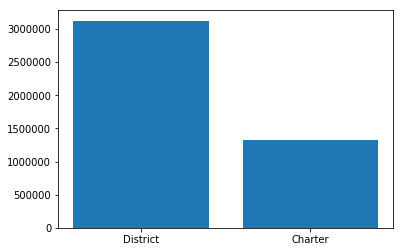

In [46]:
plt.bar(school_summary['School Type'], school_summary['Total Budget'])